In [1]:
# Import our parser modules
from mcnpy.endf.read_endf import read_endf
from mcnpy.endf.classes.mf4.plotting import plot_angular_distribution, plot_legendre_coefficients
from mcnpy.endf.classes.mf4.plotting3D import plot_angular_distribution_3d, plot_angular_distribution_heatmap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the centralized plotting utilities
from mcnpy._plot_settings import _is_notebook, _detect_interactive_backend

#%matplotlib widget
%matplotlib inline

In [2]:
# Define the path to our test file
endf_filepath = '/home/MONLEON-JUAN/MCNPy/mcnpy/endf/files/n-026_Fe_056.endf'

In [3]:
# Read only MF4 sections
endf = read_endf(endf_filepath)
mf4_mixed = endf.mf[4].mt[2]

DEBUG - Parsing MF34 MT2 with ZA=26056, AWR=55.4544, LTT=1, NMT1=1
DEBUG - Parsing subsection with MAT1=0, MT1=2, NL=6, NL1=6
DEBUG - Parsing sub-subsection with L=1, L1=1, LCT=0, NI=3
DEBUG LB=5 - NE=11
DEBUG LB=5 - Symmetric matrix: 10x10, upper triangle = 55 elements
DEBUG LB=5 - Total values to read: 11 (energies) + 55 (matrix) = 66
DEBUG LB=5 - NT field says: 66 values
DEBUG LB=5 - Starting to read 66 values from data lines...
DEBUG LB=5 - Read line 4: [1e-05, 50000, 150000, 250000, 350000, 450000] (remaining: 60)
DEBUG LB=5 - Read line 5: [550000, 650000, 750000, 850000, 20000000, 0.09072] (remaining: 54)
DEBUG LB=5 - Read line 6: [0.01232, 0.01232, 0.01232, 0.01232, 0.01232, 0.01232] (remaining: 48)
DEBUG LB=5 - Read line 7: [0.01232, 0.01232, 0, 0.1804, 0.01232, 0.01232] (remaining: 42)
DEBUG LB=5 - Read line 8: [0.01232, 0.01232, 0.01232, 0.01232, 0.01232, 0] (remaining: 36)
DEBUG LB=5 - Read line 9: [0.0426, 0.01232, 0.01232, 0.01232, 0.01232, 0.01232] (remaining: 30)
DEBUG L

/home/MONLEON-JUAN/MCNPy/mcnpy/endf/parsers/parse_endf.py:57: UserWarning: Skipping MF sections without parsers: [2, 3, 6, 12, 14, 33]. Only parsing: [1, 4, 34]
  warnings.warn(f"Skipping MF sections without parsers: {skipped_mfs}. Only parsing: {parseable_mfs}")


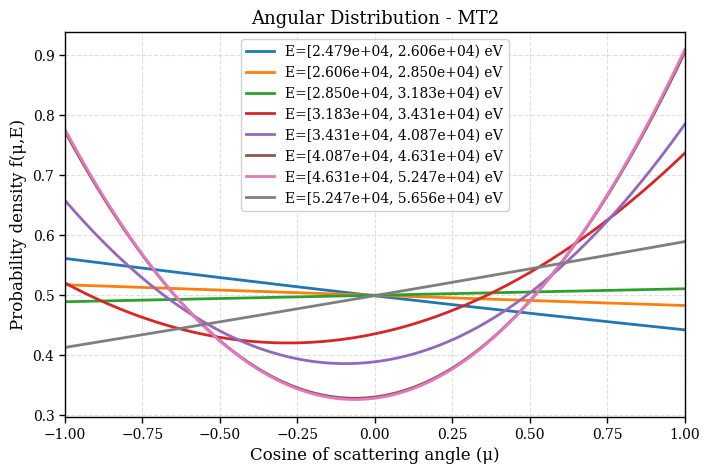

In [7]:
# 2D plots should work in both interactive and static modes
# Backend detection and sizing are handled automatically
plot_angular_distribution(mf4_mixed, energy_indices=(8,15), style='default');

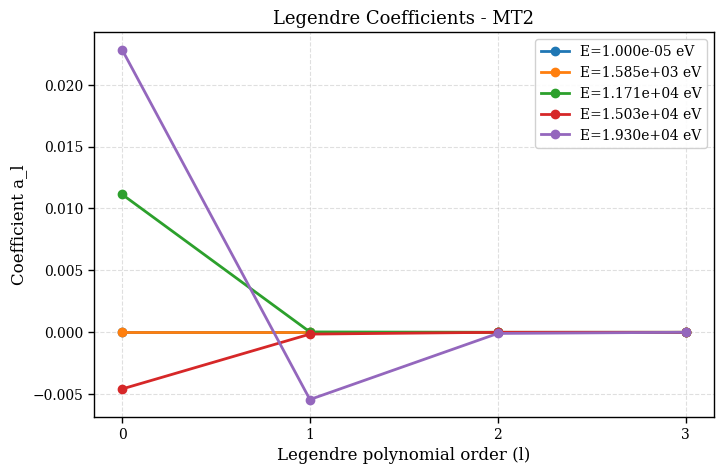

In [5]:
# Legendre coefficients plot - automatic sizing for notebooks
plot_legendre_coefficients(mf4_mixed);

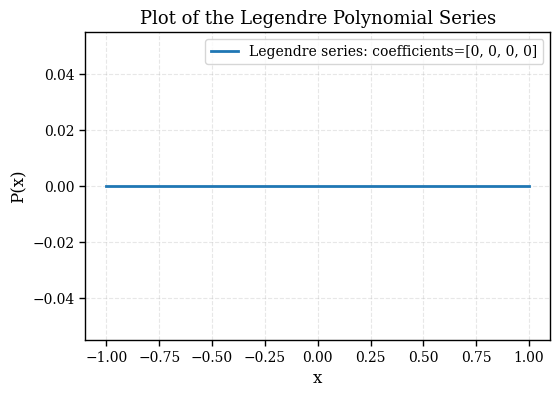

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import Legendre

# Define your Legendre coefficients here (from degree 0 upward):
coeffs = [0,0,0,0]  # <-- Modify this list and re-run the cell

# Build the Legendre series
leg_poly = Legendre(coeffs)

# Evaluate on a dense grid in [-1,1]
x = np.linspace(-1, 1, 500)
y = leg_poly(x)

# Plot the polynomial
plt.figure(figsize=(6, 4))
plt.plot(x, y, label=f"Legendre series: coefficients={coeffs}")
plt.title("Plot of the Legendre Polynomial Series")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.grid(True)
plt.legend()
plt.show()